In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load Cleaned Dataset
df = pd.read_csv("../data/cleaned_water_stress.csv", index_col="Year")

df.head()

,Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Average precipitation in depth (mm per year),Forest area (% of land area),Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,Renewable internal freshwater resources per capita (cubic meters),"Renewable internal freshwater resources, total (billion cubic meters)"
Year,,,,,,,,
1961,55.664264,25.506555,19.953656,207.0,4.145062,27.169083,971.902181,4.195
1962,55.651390,25.506555,19.953656,207.0,4.145062,27.169083,960.144065,4.195
1963,55.638517,25.506555,19.953656,207.0,4.145062,27.169083,947.566268,4.195
1964,56.166323,25.506555,20.468589,207.0,4.145062,27.169083,934.325701,4.195
1965,56.153450,25.506555,20.468589,207.0,4.145062,27.169083,919.676809,4.195


In [3]:
# Define Features and Target
target_column = "Level of water stress: freshwater withdrawal as a proportion of available freshwater resources"

X = df.drop(columns=[target_column])
y = df[target_column]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (63, 7)
y shape: (63,)


In [4]:
# Chronological Train/Test Split
split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [5]:
## MODEL 1 — Linear Regression
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

In [6]:
# Evaluate Linear Regression
mae = mean_absolute_error(y_test, lr_predictions)
rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Linear Regression Results
MAE: 5.460132858668378e-09
RMSE: 6.053032421752179e-09
R2: 1.0


In [7]:
## MODEL 2 — Random Forest (Better Model)
# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

In [8]:
# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
r2_rf = r2_score(y_test, rf_predictions)

print("Random Forest Results")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)

Random Forest Results
MAE: 14.637446947746286
RMSE: 15.650974141512359
R2: -7.119448070387023


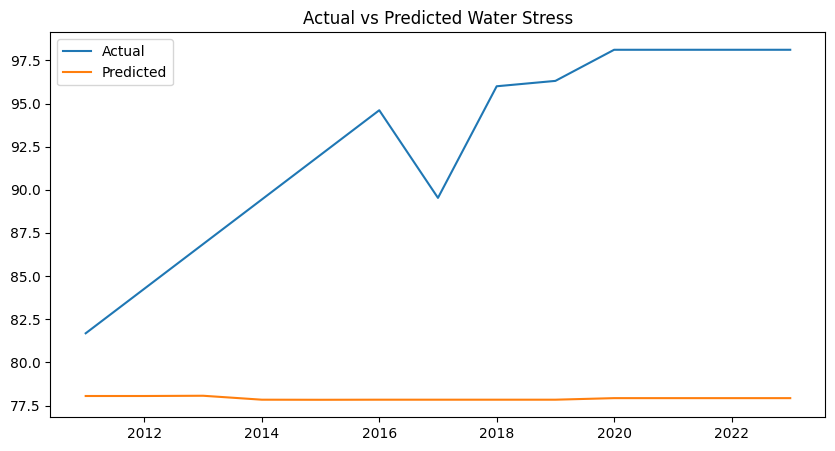

In [9]:
# Visualize Predictions
plt.figure(figsize=(10,5))

plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, rf_predictions, label="Predicted")

plt.legend()
plt.title("Actual vs Predicted Water Stress")
plt.show()

In [10]:
# Forecast Next Year (Example)
last_row = df.iloc[-1:].drop(columns=[target_column])
next_prediction = rf_model.predict(last_row)

print("Predicted next water stress value:", next_prediction[0])

Predicted next water stress value: 77.92684745317847
